<a href="https://colab.research.google.com/github/jonahyuan/AI-learning/blob/main/6_16Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
from urllib.request import urlretrieve
url = "https://github.com/Elwing-Chou/tibaml0606/raw/main/titanic/train.csv"
urlretrieve(url, "train.csv")
url = "https://github.com/Elwing-Chou/tibaml0606/raw/main/titanic/test.csv"
urlretrieve(url, "test.csv")

('test.csv', <http.client.HTTPMessage at 0x7f8bdc5e9950>)

In [40]:
import pandas as pd
train_df = pd.read_csv("train.csv", encoding="utf-8")
predict_df = pd.read_csv("test.csv", encoding="utf-8")

In [41]:
df1 = pd.DataFrame([
     [1,2],               
      [3,4]
])
df2 = pd.DataFrame([
     [5,6,],               
      [7,8]
])
pd.concat([df1, df2], axis=0)

,0,1
0,1,2
1,3,4
0,5,6
1,7,8


In [42]:
datas = pd.concat([train_df, predict_df], axis=0, ignore_index=True)
datas = datas.drop(["PassengerId", "Survived"], axis=1)

In [43]:
df = pd.DataFrame([
    [1, 2],
    [3, 4]
])
df.sum(axis=1)

0    3
1    7
dtype: int64

In [44]:
# pandas篩選: 篩選[針對每一筆給出True/False]
df = pd.DataFrame([
    [1, 2],
    [3, 4]
])
df[[False, True]]
s = pd.Series(["A", "B", "C"])
s[[True, True, False]]

0    A
1    B
dtype: object

In [45]:
# 資料預處理
# Step1. 填補空值
# 1.1 check有多少空值
s = datas.isna().sum()
# s[s != 0]: filter操作
s[s != 0].sort_values(ascending=False)

Cabin       1014
Age          263
Embarked       2
Fare           1
dtype: int64

In [46]:
# 1.2 check每一個欄位是哪一種型態
# a.數值(1.2.3...一直增加):Age, SibSp, Parch, Ticket(多少人share), Fare 
# b.類別(固定數值):Pclass, Name(mid), Sex, Cabin(first), Embarked
# 補空值(最可能出現的值)
# 類別:補最常出現的值
# 數值:絕對不是平均值，而是中位數

In [47]:
# 處理一下 Name/Cabin/Ticket
def cabinchange(c):
  if pd.isna(c):
    return None
  else:
    return c[0]
datas["Cabin"] = datas["Cabin"].apply(cabinchange)

In [48]:
count = {"a":5, "b":3, "c":2}
s = pd.Series(["a", "b", "c"])
def change(c):
    return count[c]
s.apply(change)

0    5
1    3
2    2
dtype: int64

In [49]:
counts = datas["Ticket"].value_counts()
def ticketchange(t):
  if pd.isna(t):
    return None
  else:
    return counts[t]
datas["Ticket"] = datas["Ticket"].apply(ticketchange)

In [50]:
datas["Name"]

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [51]:
#n = "  Behr, Mr. Karl Howell"
def namechange(n):
  return n.split(",")[-1].split(".")[0].strip()
datas["Name"] = datas["Name"].apply(namechange)

In [52]:
# 耍帥用
import re
n = "  Behr, Mr. Karl Howell"
# .+任意一個字一次以上 ,:逗號 (.+):任意一個字一次以上，並且group起來 \.:match點 +:任意一個字以上
pat = r".+,(.+)\..+"
re.match(pat, n).group(1).strip()

'Mr'

In [53]:
most = datas["Embarked"].value_counts().idxmax()
datas["Embarked"] = datas["Embarked"].fillna(most)

In [54]:
df = pd.DataFrame([
    [1, 2, "a"],
    [None, None, None],
], columns=["D", "E", "F"])
fill = {"D":2.5, "E":3.1, "F":"bbb"}
df.fillna(fill)

,D,E,F
0,1.0,2.0,a
1,2.5,3.1,bbb


In [55]:
med = datas.median().drop(["Pclass"])
datas = datas.fillna(med)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [56]:
count = datas["Name"].value_counts()
reserved = count[count > 50].index
def namefilter(mid):
  if mid in reserved:
    return mid
  else:
    return None
datas["Name"] = datas["Name"].apply(namefilter)

In [57]:
pd.set_option("display.max_columns", 30)
datas = pd.get_dummies(datas)
datas = pd.get_dummies(datas, columns=["Pclass"])
datas

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [58]:
datas["Family"] = datas["SibSp"] = datas["Parch"]
datas

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,22.0,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,38.0,0,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,35.0,0,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [59]:
df = pd.DataFrame([
    [1, 2],
    [3, 4],
    [5, 6]
], index=["a", "b", "c"])
# .iloc: 依據你的第幾列 -> [1st, 2nd, 3rd]
df.iloc[[0, 2]]
# .loc: 依據你的列標籤
df.loc[["a", "c"]]

,0,1
a,1,2
c,5,6


In [60]:
import numpy as np
x = np.array(datas.iloc[:len(train_df)])
y = np.array(train_df["Survived"])
x_predict = np.array(datas.iloc[len(train_df):])

[Text(0.4955357142857143, 0.9166666666666666, 'Age <= 6.5\ngini = 0.467\nsamples = 574\nvalue = [560, 331]'),
 Text(0.21428571428571427, 0.75, 'Embarked_Q <= 0.5\ngini = 0.431\nsamples = 32\nvalue = [16, 35]'),
 Text(0.17857142857142858, 0.5833333333333334, 'Family <= 1.5\ngini = 0.408\nsamples = 30\nvalue = [14, 35]'),
 Text(0.10714285714285714, 0.4166666666666667, 'Pclass_2 <= 0.5\ngini = 0.305\nsamples = 18\nvalue = [6, 26]'),
 Text(0.07142857142857142, 0.25, 'Fare <= 20.167\ngini = 0.469\nsamples = 8\nvalue = [6, 10]'),
 Text(0.03571428571428571, 0.08333333333333333, 'gini = 0.0\nsamples = 5\nvalue = [0, 10]'),
 Text(0.10714285714285714, 0.08333333333333333, 'gini = 0.0\nsamples = 3\nvalue = [6, 0]'),
 Text(0.14285714285714285, 0.25, 'gini = 0.0\nsamples = 10\nvalue = [0, 16]'),
 Text(0.25, 0.4166666666666667, 'Pclass_3 <= 0.5\ngini = 0.498\nsamples = 12\nvalue = [8, 9]'),
 Text(0.21428571428571427, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 4]'),
 Text(0.2857142857142857, 0.25, '

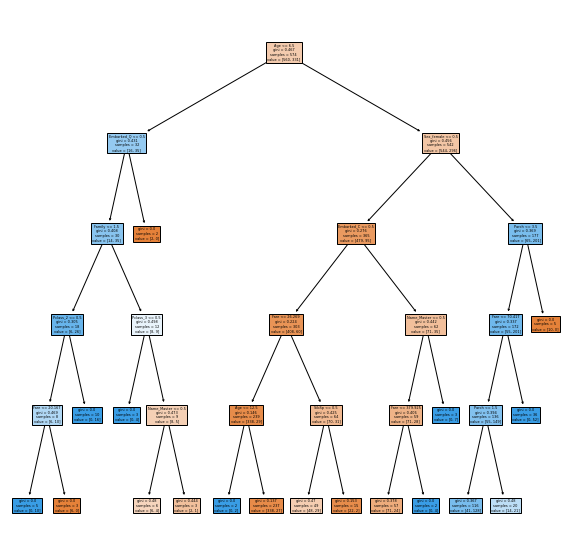

In [61]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=5, n_jobs=-1)
clf.fit(x, y)
plt.figure(figsize=(10,10))
plot_tree(clf.estimators_[3], feature_names=datas.columns, filled=True)

In [62]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(n_estimators=131, max_depth=6)
scores = cross_val_score(clf, x, y, cv=10, n_jobs=-1)
print(scores)
print(np.average(scores))

[0.82222222 0.86516854 0.75280899 0.88764045 0.86516854 0.82022472
 0.84269663 0.78651685 0.86516854 0.83146067]
0.8339076154806492


In [ ]:
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier()
params = {
    "n_estimators":range(11, 150, 2),
    "max_depth":[5, 6, 7, 8, 9, 10]
}
cv = GridSearchCV(clf, params, cv=10, n_jobs=-1)
cv.fit(x, y)

In [ ]:
cv.best_params_

In [64]:
clf = RandomForestClassifier(n_estimators=131, max_depth=6)
clf.fit(x, y)
pre = clf.predict(x_predict)
df = pd.DataFrame({
    "PassengerId":predict_df["PassengerId"],
    "Survived":pre
})
df.to_csv("rf.csv", encoding="utf-8", index=False)

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
datas_scale = scaler.fit_transform(datas)
# 已經是np array, 所以不是用.iloc(pandas)
x_scale = datas_scale[:len(train_df)]
x_predict_scale = datas_scale[len(train_df):]

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
clf = KNeighborsClassifier()
params = {
    "n_neighbors":range(5, 50)
}
cv = GridSearchCV(clf, params, cv=10, n_jobs=-1)
cv.fit(x_scale, y)
cv.best_params_

{'n_neighbors': 7}

In [67]:
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(x_scale, y)
pre = clf.predict(x_predict_scale)
df = pd.DataFrame({
    "PassengerId":predict_df["PassengerId"],
    "Survived":pre
})
df.to_csv("knn.csv", encoding="utf-8", index=False)

In [68]:
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(x_scale, y)
pre = clf.predict(x_predict_scale)
df = pd.DataFrame({
    "PassengerId":predict_df["PassengerId"],
    "Survived":pre
})
df.to_csv("adjust.csv", encoding="utf-8", index=False)

In [69]:
clf = KNeighborsClassifier()
params = {
    "n_neighbors":range(5, 50)
}
cv = GridSearchCV(clf, params, scoring="f1", cv=10, n_jobs=-1)
cv.fit(x_scale, y)
cv.best_params_

{'n_neighbors': 7}

In [ ]:
pd.DataFrame({
    "importance":clf.feature_importances_
}, index=datas.columns).sort_values(by="importance", ascending=False)

In [70]:
clf = RandomForestClassifier(n_estimators=131, max_depth=6)
clf.fit(x, y)
pre = clf.predict(x_predict)
df = pd.DataFrame({
    "PassengerId":predict_df["PassengerId"],
    "Survived":pre
})
df.to_csv("rf.csv", encoding="utf-8", index=False)

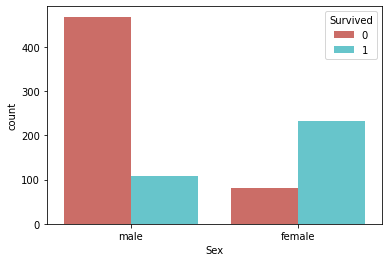

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x=train_df["Sex"], hue=train_df["Survived"], palette=sns.color_palette("hls", 2))

In [ ]:
plt.figure(figsize=(14,10))
fcut = pd.cut(train_df["Fare"], 10)
sns.countplot(x=fcut, hue=train_df["Survived"], palette=sns.color_palette("hls", 2))
plt.xticks(rotation=30)
plt.legend(loc="upper right")

In [ ]:
plt.figure(figsize=(14, 10))
fcut = pd.cut(train_df["Age"], 10)
sns.countplot(x=fcut, hue=train_df["Survived"], palette=sns.color_palette("hls", 2))
plt.xticks(rotation=30)
plt.legend(loc="upper right")

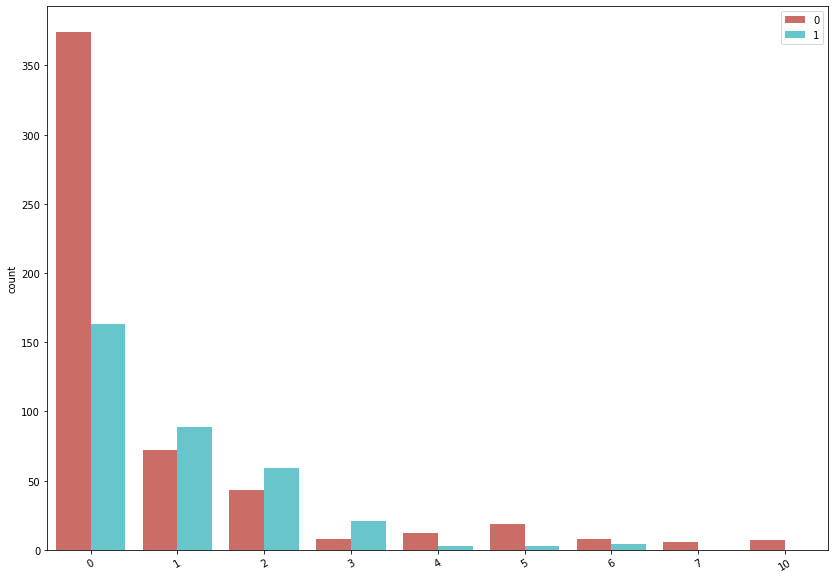

In [90]:
plt.figure(figsize=(14, 10))
fcut = pd.cut(train_df["Age"], 10)
sns.countplot(x=train_df["SibSp"]+train_df["Parch"], hue=train_df["Survived"], palette=sns.color_palette("hls", 2))
plt.xticks(rotation=30)
plt.legend(loc="upper right")